#**Parameter Analysis for the ARIMA model**

## Import the library


In [ ]:
! pip install pmdarima

import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX


## Read dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Traffic dataset

In [ ]:
traffic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/T5 - Bootcamp/data/نسخة من traffic.csv",
                      usecols=[0, 2]
                      ).reset_index()
traffic.head()

,index,DateTime,Vehicles
0,0,2015-11-01 00:00:00,15
1,1,2015-11-01 01:00:00,13
2,2,2015-11-01 02:00:00,10
3,3,2015-11-01 03:00:00,7
4,4,2015-11-01 04:00:00,9


In [ ]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     48120 non-null  int64 
 1   DateTime  48120 non-null  object
 2   Junction  48120 non-null  int64 
 3   Vehicles  48120 non-null  int64 
 4   ID        48120 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.8+ MB


In [ ]:
traffic["DateTime"] = pd.to_datetime(traffic["DateTime"])
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   index     48120 non-null  int64         
 1   DateTime  48120 non-null  datetime64[ns]
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


In [ ]:
traffic[:1000][-280:]

,index,DateTime,Vehicles
720,720,2015-12-01 00:00:00,21
721,721,2015-12-01 01:00:00,20
722,722,2015-12-01 02:00:00,18
723,723,2015-12-01 03:00:00,13
724,724,2015-12-01 04:00:00,14
...,...,...,...
995,995,2015-12-12 11:00:00,15
996,996,2015-12-12 12:00:00,19
997,997,2015-12-12 13:00:00,16
998,998,2015-12-12 14:00:00,14


In [ ]:
traffic_sample = traffic[:1000]
traffic_sample

,index,DateTime,Vehicles
0,0,2015-11-01 00:00:00,15
1,1,2015-11-01 01:00:00,13
2,2,2015-11-01 02:00:00,10
3,3,2015-11-01 03:00:00,7
4,4,2015-11-01 04:00:00,9
...,...,...,...
995,995,2015-12-12 11:00:00,15
996,996,2015-12-12 12:00:00,19
997,997,2015-12-12 13:00:00,16
998,998,2015-12-12 14:00:00,14


In [ ]:
stepwise_fit = auto_arima(traffic_sample["Vehicles"], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True
                          )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=12.90 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=7559.164, Time=0.29 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5466.849, Time=6.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.86 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=7557.175, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=6137.337, Time=0.19 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=5446.815, Time=10.88 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=27.47 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.21 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=4.47 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=5390.467, Time=9.40 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=5404.484, Time=2.56 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=28.86 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=6.25 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=5392.46

In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1000
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -2689.235
Date:                            Wed, 21 Aug 2024   AIC                           5388.470
Time:                                    09:22:05   BIC                           5412.948
Sample:                                         0   HQIC                          5397.779
                                           - 1000                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5989      0.028     21.505      0.000       0.544       0.654
ar.L2          0.2512      0.028      8.947      0.000       0.196       0.306
ar.S.L12      -0.8546      0.028    -30.723      0.000      -0.909      -0.800
ar.S.L24      -0.1313      0.032     -4.143      0.000      -0.193      -0.069
sigma2        13.3890      0.402     33.316      0.000      12.601      14.177
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               340.45
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.48
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train = traffic_sample.iloc[:720]
test = traffic_sample.iloc[720:]


In [ ]:
# SARIMAX(2, 0, 0)x(2, 1, 0, 12)
model = SARIMAX(traffic_sample["Vehicles"],
                order=(2, 0, 0),
                seasonal_order=(2, 1, 0, 12)
                )

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Vehicles   No. Observations:                 1000
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -2689.235
Date:                            Wed, 21 Aug 2024   AIC                           5388.470
Time:                                    09:22:33   BIC                           5412.948
Sample:                                         0   HQIC                          5397.779
                                           - 1000                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5989      0.028     21.505      0.000       0.544       0.654
ar.L2          0.2512      0.028      8.947      0.000       0.196       0.306
ar.S.L12      -0.8546      0.028    -30.723      0.000      -0.909      -0.800
ar.S.L24      -0.1313      0.032     -4.143      0.000      -0.193      -0.069
sigma2        13.3890      0.402     33.316      0.000      12.601      14.177
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               340.45
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.48
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")


<Axes: >

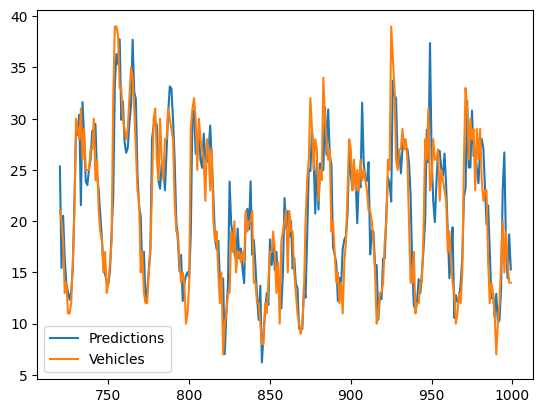

In [ ]:
predictions.plot(legend=True)
test.plot(legend=True)

In [ ]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Vehicles"], predictions)

# Calculate mean squared error
mean_squared_error(test["Vehicles"], predictions)


12.869611338867124

In [ ]:
traffic_sample.describe()

,index,DateTime,Vehicles
count,1000.000000,1000,1000.000000
mean,499.500000,2015-11-21 19:29:59.999999744,20.577000
min,0.000000,2015-11-01 00:00:00,6.000000
25%,249.750000,2015-11-11 09:45:00,14.000000
50%,499.500000,2015-11-21 19:30:00,20.000000
75%,749.250000,2015-12-02 05:15:00,26.000000
max,999.000000,2015-12-12 15:00:00,48.000000
std,288.819436,NaN,7.496951


## Airline passengers dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/T5 - Bootcamp/data/نسخة من airline-passengers.csv").reset_index()
df.head()

,index,Month,Passengers
0,0,1949-01,112
1,1,1949-02,118
2,2,1949-03,132
3,3,1949-04,129
4,4,1949-05,121


## Fit auto_arima function to AirPassengers dataset


In [ ]:
stepwise_fit = auto_arima(df["Passengers"], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True
                          )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.32 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.35 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.05 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.44 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.27 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.49 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.67 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.40 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.15 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.45 sec
 ARIMA(0,1,1)(1,1,1)[12]     

## To print the summary


In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 21 Aug 2024   AIC                           1019.178
Time:                                     08:43:33   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fit ARIMA Model

## Split data into train / test sets


In [ ]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

## Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set


In [ ]:

model = SARIMAX(train["Passengers"],
                 order=(0, 1, 1),
                 seasonal_order=(2, 1, 1, 12)
                 )

result = model.fit()

result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.013
Date:                            Wed, 21 Aug 2024   AIC                            896.027
Time:                                    08:44:10   BIC                            909.922
Sample:                                         0   HQIC                           901.669
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2982      0.076     -3.934      0.000      -0.447      -0.150
ar.S.L12       0.7105      0.237      2.998      0.003       0.246       1.175
ar.S.L24       0.2886      0.100      2.885      0.004       0.093       0.485
ma.S.L12      -0.9800      2.262     -0.433      0.665      -5.413       3.453
sigma2        88.2971    179.432      0.492      0.623    -263.384     439.978
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions of ARIMA Model against the test set

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

prediction = result.predict(start, end,
                            typ="levels")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
prediction

,predicted_mean
132,420.087651
133,398.327050
134,461.091157
135,449.210113
136,473.669057
137,535.462807
138,611.391907
139,624.443724
140,518.445753
141,462.141717


In [ ]:
predictions = prediction.rename("Predictions")

## plot predictions and actual values



<Axes: >

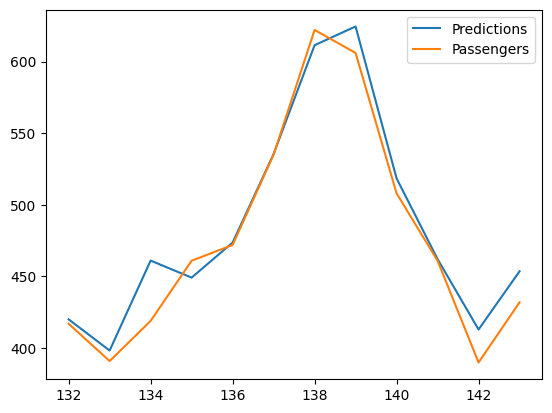

In [ ]:
# legend = True: Shows the columns name
predictions.plot(legend = True)
test["Passengers"].plot(legend = True)


## Evaluate the model using MSE and RMSE

In [ ]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Passengers"], predictions)

# Calculate mean squared error
mean_squared_error(test["Passengers"], predictions)


294.7098442702099

#**Well Done :)**